### 目录

* [1.RNN的引入](#1.RNN的引入)
* [2.RNN vs LSTM](#2.RNN_vs_LSTM)
    * [Section 2.1](#section_2_1)
    * [Section 2.2](#section_2_2)

## 1.RNN的引入
想象以下应用场景：我们需要判断影片中的每一时刻点发生的事件。传统的神经网络由于没有persistence,因此无法胜任这一场景。但Recurrent Neuron Network（循环神经网络, RNN）就可以胜任这一点，关于RNN能够做到的amazing事情，可以见延伸阅读的材料1.
循环神经网络之所以能够做到persistence,是因为在网络内部含有loop，其结果图如下图所示：
<div>
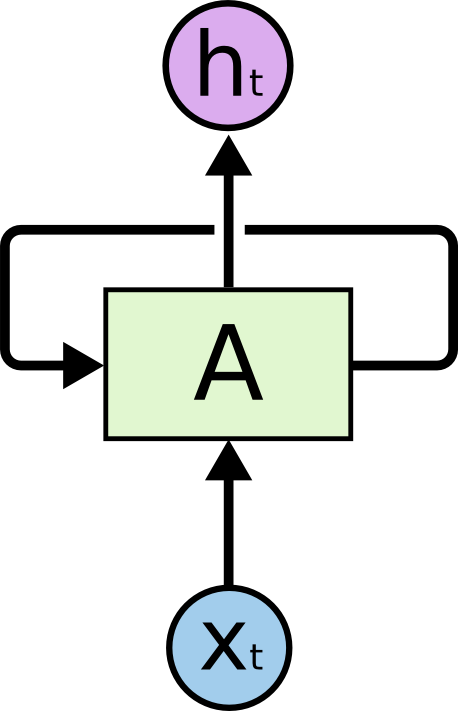
</div>
感觉还是有点抽象，将其进行展开看：

<div>
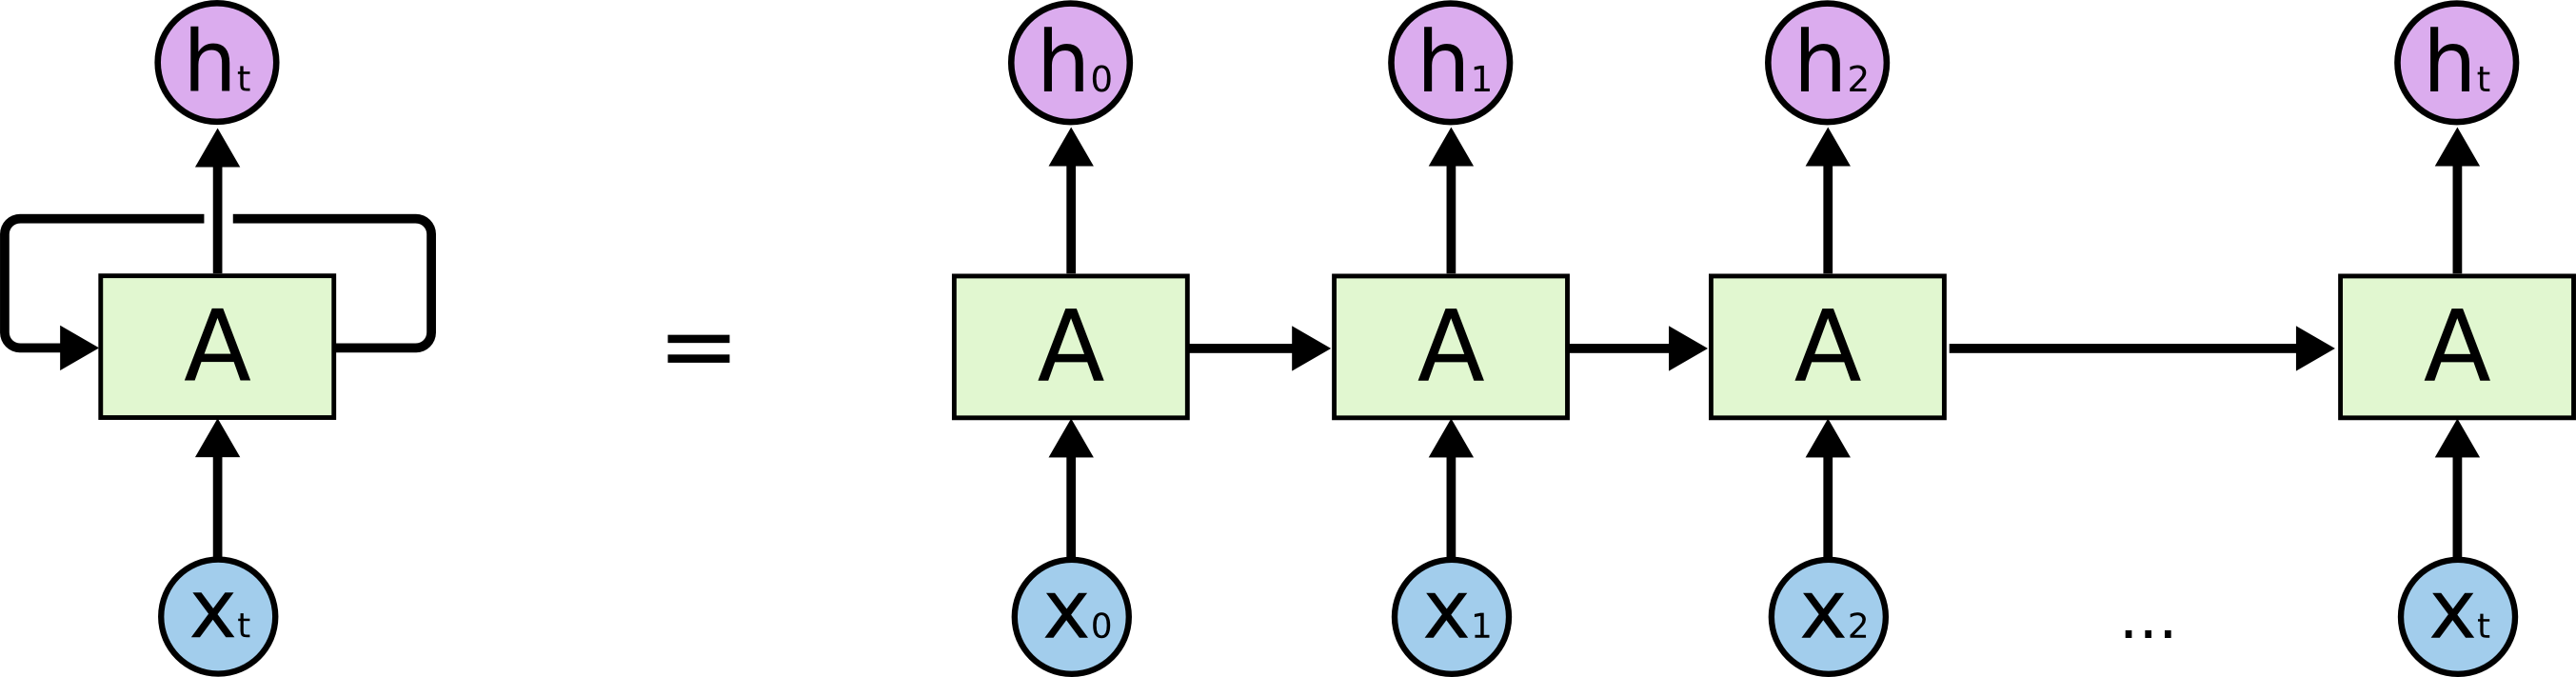
</div>
展开之后的结构给我们一种直观的感觉：RNN适用于sequences和lists任务。事实也是如此，RNN已经成功的在语音识别（speech recognition）,语言模型(language modeling), translation(翻译),看图说话（image caption)任务上得到了成功应用。

## 2. RNN vs LSTM
lstm作为rnn的一个特例，事实上上述场景的成功应用都是lstm的成功应用。因为RNN具有其自身结果的局限性。
### 2.1 RNN的局限性
根据RNN的结构，我们想当然的认为它能够链接先前的信息到现在的任务。但是RNN真的可以做到这一点吗？视情况而定。
对于仅需要look at较近信息的任务可以表现出较好的persistent.例如预测“The clouds are in the sky.”中的最后 一个字。相关信息之间的gap比较小， RNN可以学习。但如果是这样的一段话："I grew up in Fance....I speak fluent French." 不幸的是随着gap的增加， RNN变得不能够去学习链接这些信息。如果想从理论上理解rnn在这种情形下的局限性，也可以参看延伸阅读材料2和3中的论文。
### 2.2 Lstm的厉害之处
然而lstm不具有这样的局限性，首先来看rnn的结构图是这个样子的，仅仅有一个双曲正切函数(tanh)
<div>
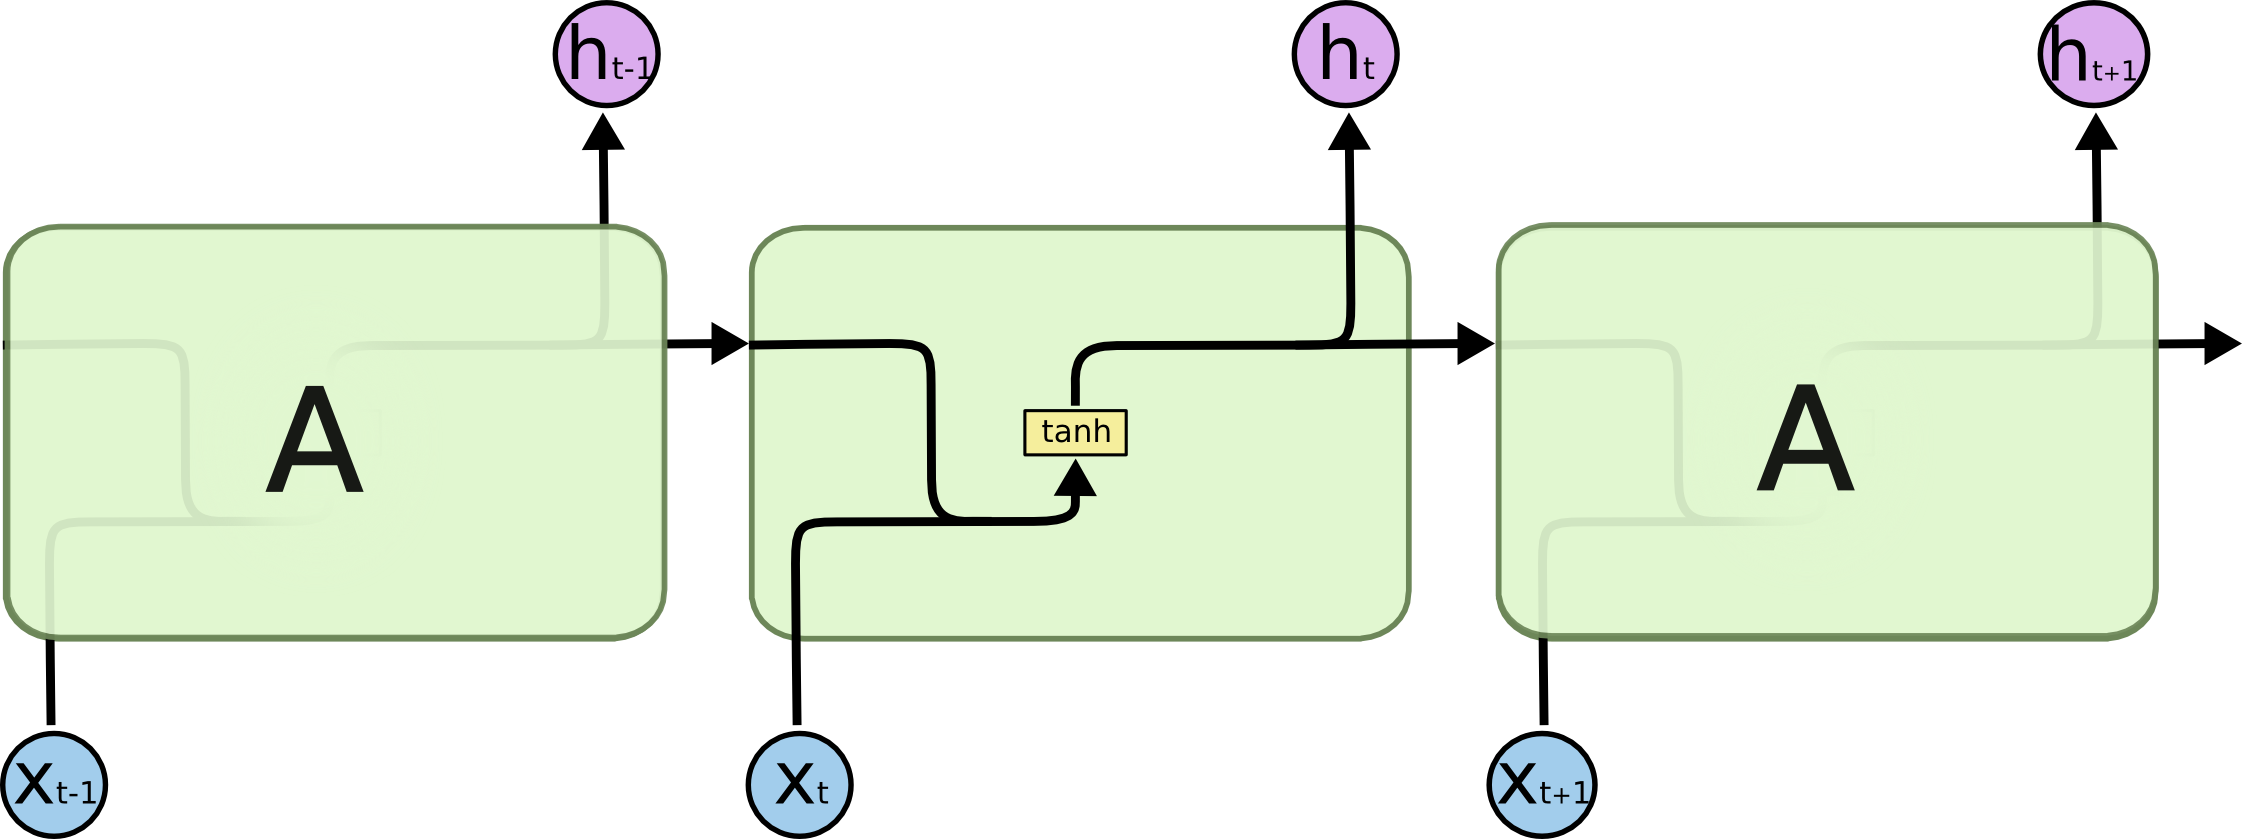
</div>

那么lstm的结构是什么样子的呢？相对来讲就比较复杂了：
<div>
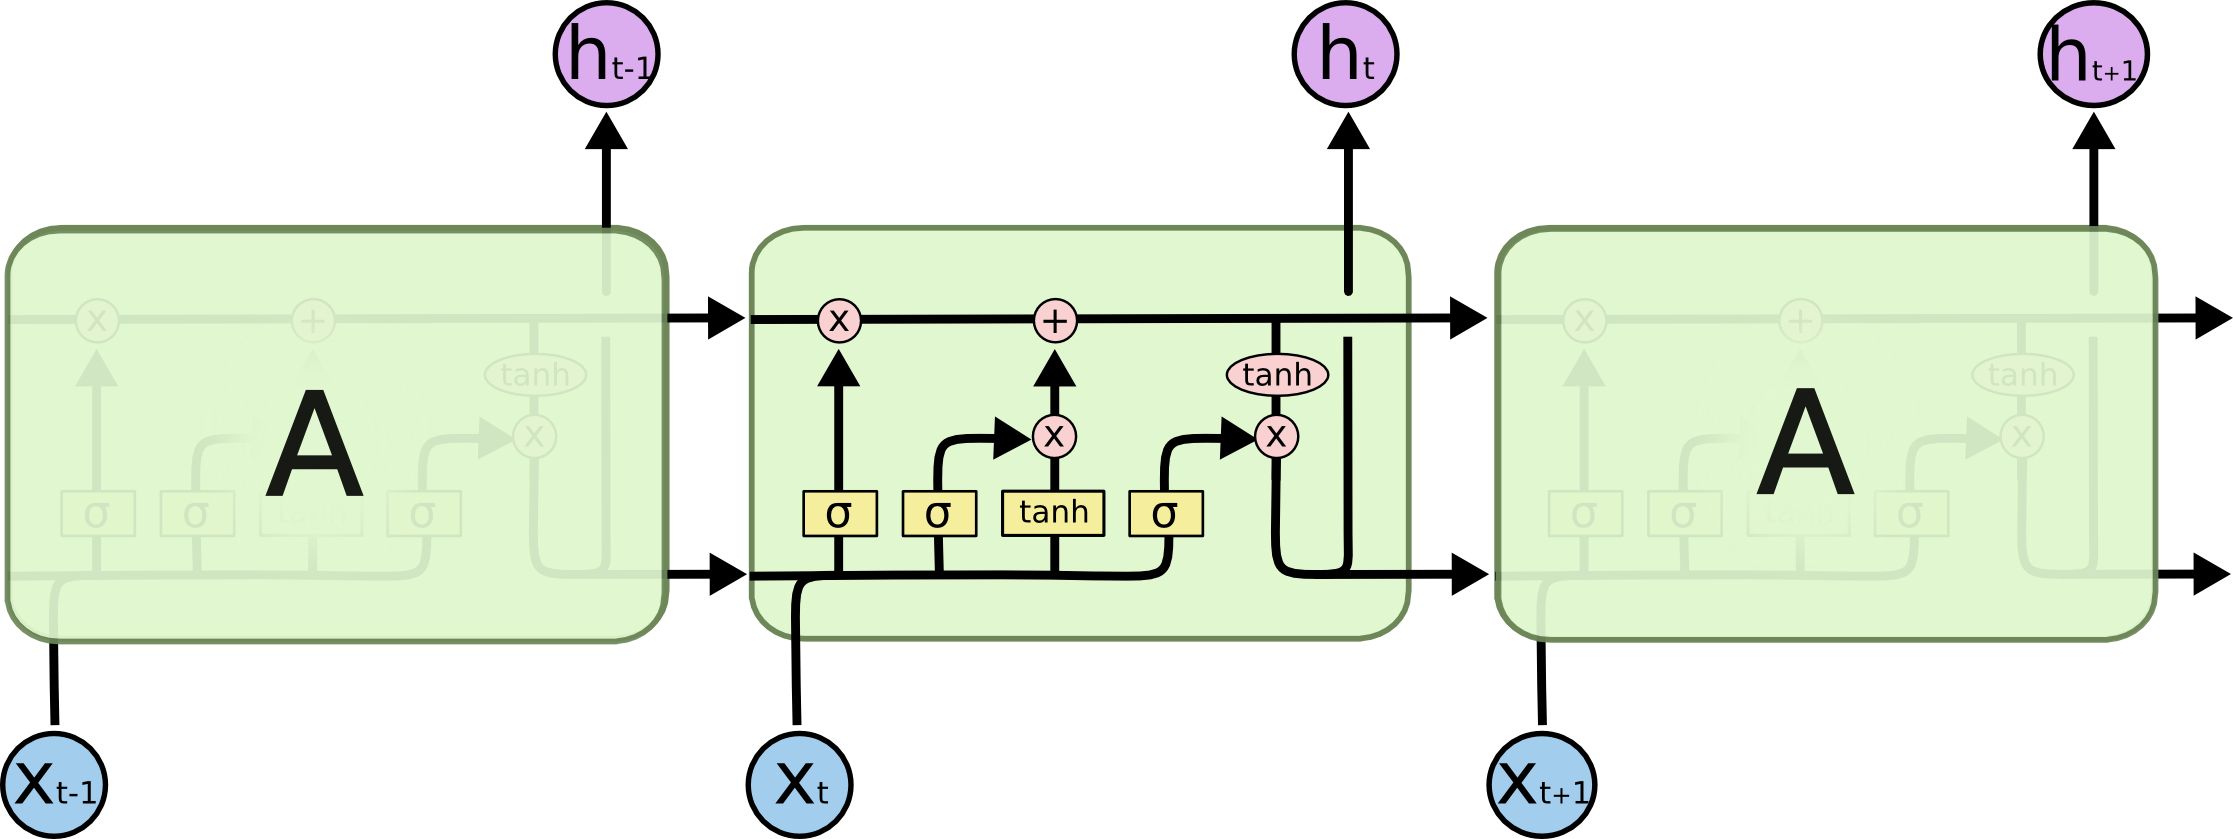
</div>


<div>
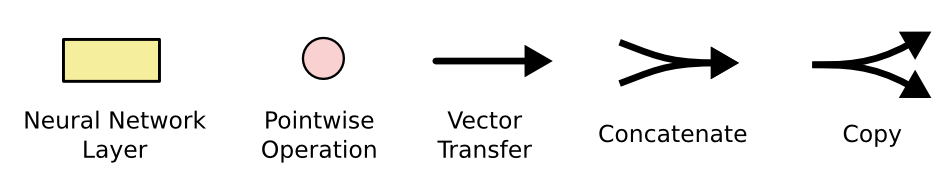
</div>
x和h显然分别对应当前position的输入和输出。两个相邻network之间的两条线：其中上面一条线代表cell state，而下面一条线代表当前position的输出。所以从大的维度上来看，lstm和rnn之间并无差异。而lstm的主要差异点还是在network的内部。

## 3. 如何理解lstm
lstmd的核心在于cell state的传输。如图所示分别是cell state的传输流
<div>
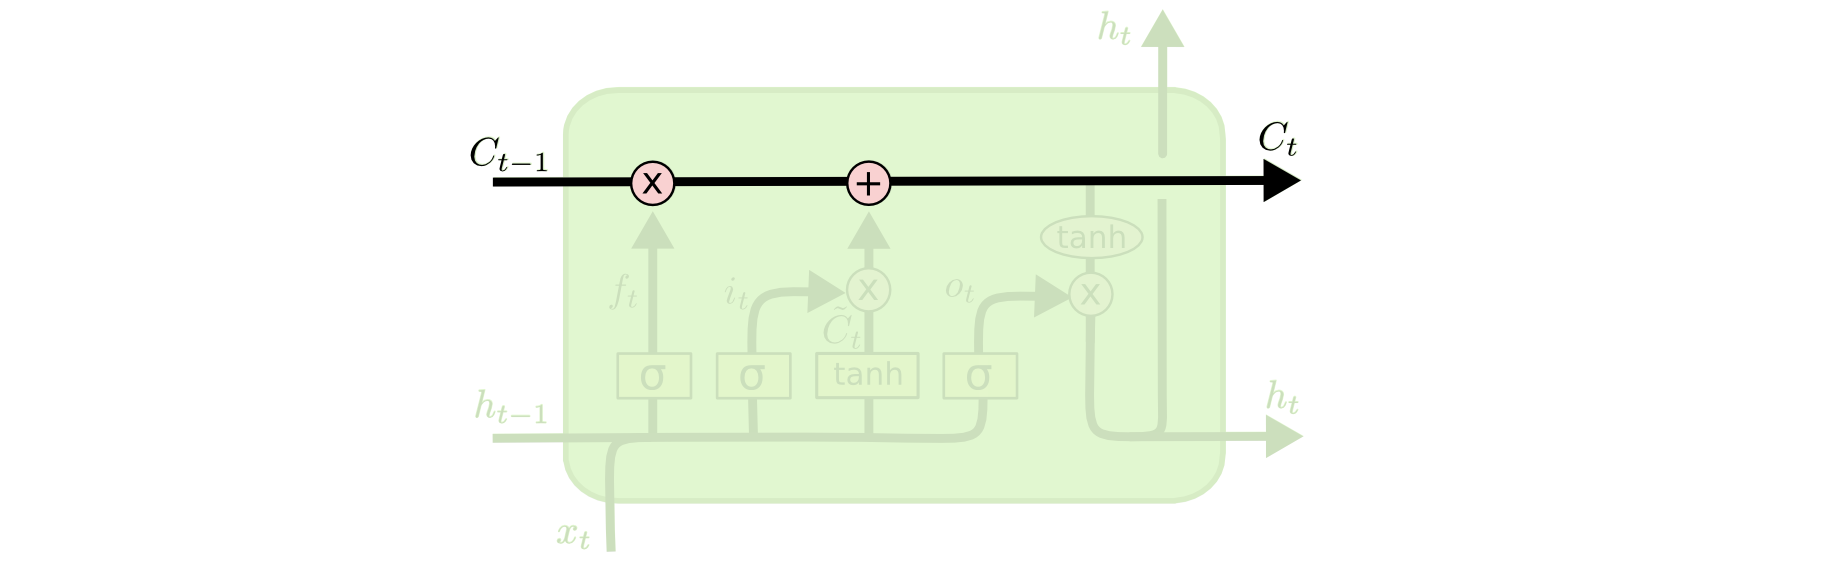
</div>


该传输流由一些gate开关和简单的线性操作进行交互。
<div>
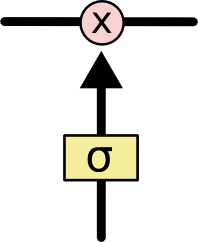
</div>
gate开关其实就是一个sigmoid函数，当gate开关为1是就是将cell state的所有信息保存下来；当gate开关为0时就是将cell state完全舍弃。因此一个sequence无论多长，总有一种极端情形将长距离的cell建立其关系。

### 3.1 step1: 决定cell state信息我们要保留多少舍弃多少


<div>
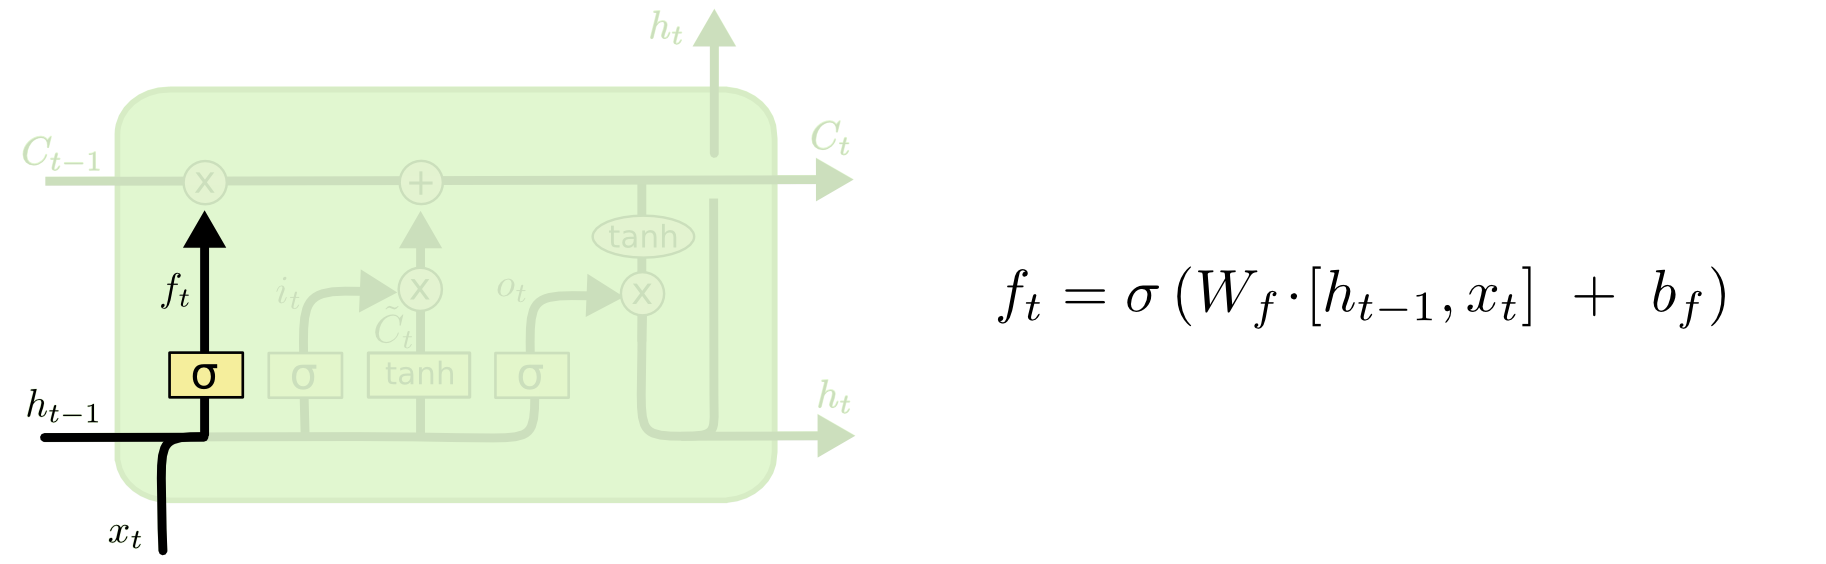
</div>
它被称之为"forget gate layer"，其结构就是一个sigmoid层，它的输入包含上一position的输出和当前position的输入。

### 3.2 step2: 决定当前cell我们要将什么样新的信息存储到cell state中
<div>
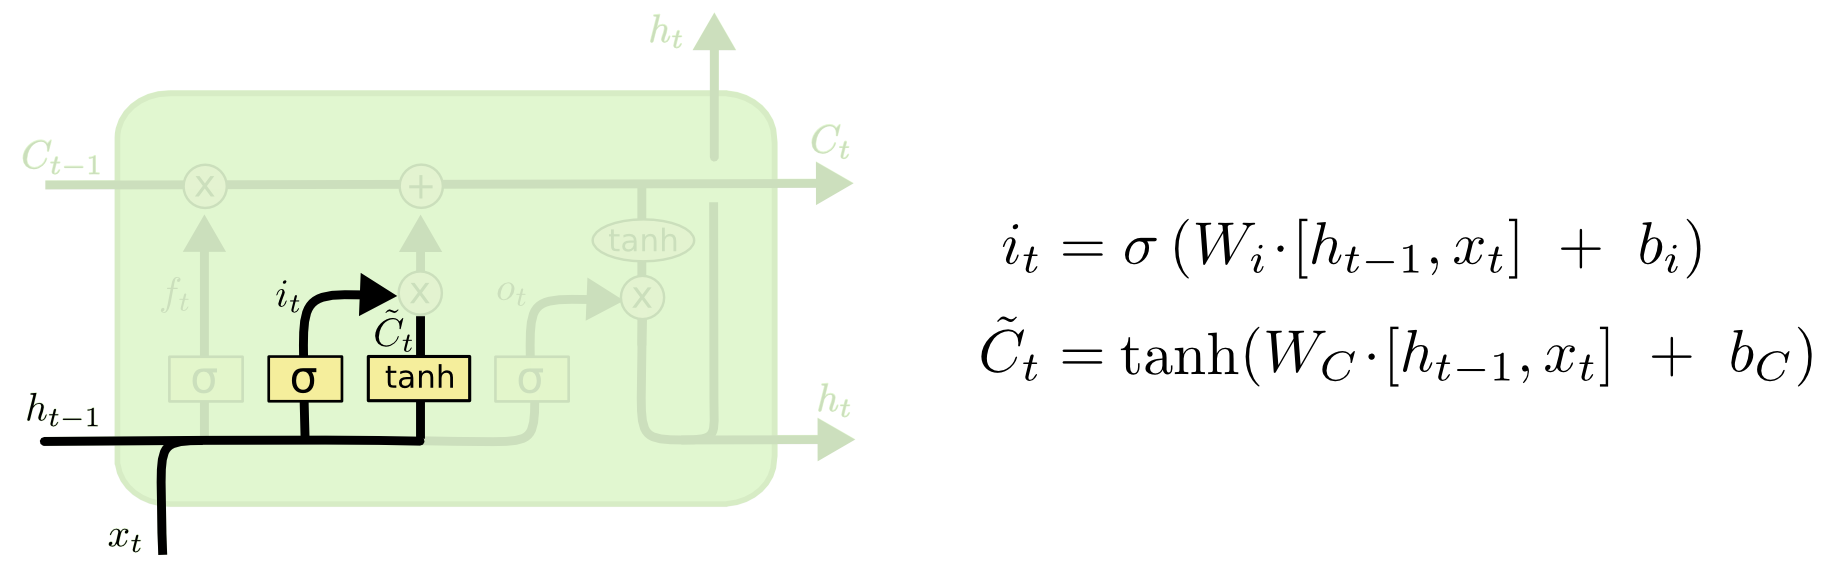
</div>

### 3.3 step3: 决定当前position要输出什么
<div>
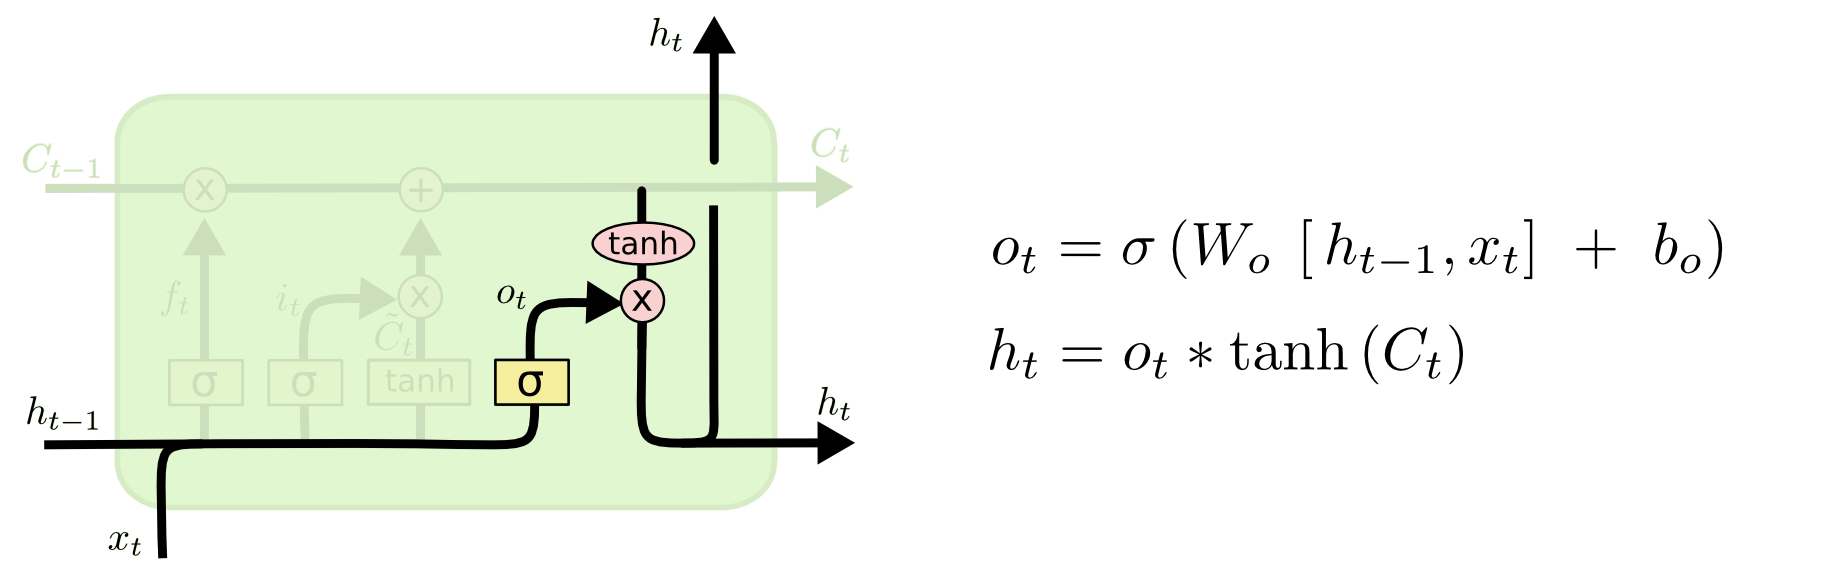
</div>

## 4. 参考文献
主要内容整理于https://colah.github.io/posts/2015-08-Understanding-LSTMs/

## 5. 延伸阅读
延伸阅读1： http://karpathy.github.io/2015/05/21/rnn-effectiveness/

延伸阅读2： https://people.idsia.ch/~juergen/SeppHochreiter1991ThesisAdvisorSchmidhuber.pdf

延伸阅读3：Bengio, et al. (1994)

延伸： rnn---->lstm------>attention
